In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [95]:
import seaborn as sns

## DATA GENERATION

In [52]:
x = np.random.normal(size = 1000)
print(type(x))
print(x.shape)
print(x.max())

<class 'numpy.ndarray'>
(1000,)
3.177521027853302


In [53]:
init = 2*x + 3
print(type(init))
print(init.shape)

<class 'numpy.ndarray'>
(1000,)


In [54]:
noise = np.random.normal(size = 1000)
y = noise + init
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(1000,)


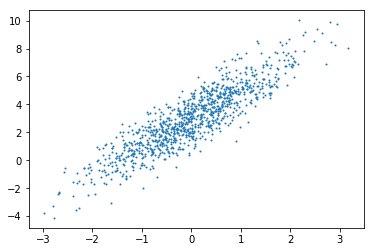

In [55]:
plt.scatter(x,y,marker = 'o',s = 1)
plt.show()

# LINEAR REGRESSION

### Gradient Descent:

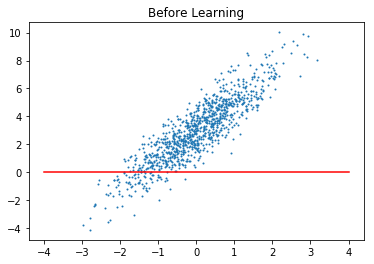

In [117]:
m = 0.00
c = 0.00
xi = np.linspace(-4,4,100)
def h(x,m,c):
    return m*x + c
plt.scatter(x,y,marker = 'o', s = 1)
plt.plot(xi,h(xi,m,c),color = 'red')
plt.title('Before Learning')
plt.show()

In [118]:
def error_1(x,y,m,c):
    return (h(x,m,c)-y)
def error_2(x,y,m,c):
    return (error_1(x,y,m,c)*error_1(x,y,m,c))

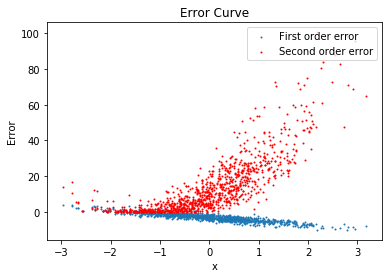

In [119]:
plt.scatter(x,error_1(x,y,m,c),marker = 'o',s = 1,label = 'First order error')
plt.scatter(x,error_2(x,y,m,c),marker = 'o',s = 1,label = 'Second order error',color = 'red')
plt.legend(loc = 'upper right')
plt.title('Error Curve')
plt.xlabel('x')
plt.ylabel('Error')
plt.show()

In [120]:
def grad_1(x,y,m,c):
    a = 0.00
    err = error_1(x,y,m,c)
    for i in range(0,1000):
        a = a + err[i]
    return a/1000
def grad_2(x,y,m,c):
    a = 0.00
    err = np.multiply(error_1(x,y,m,c),x)
    for i in range(0,1000):
        a = a + err[i]
    return a/1000

2.0036334617908387
3.0094246623081795


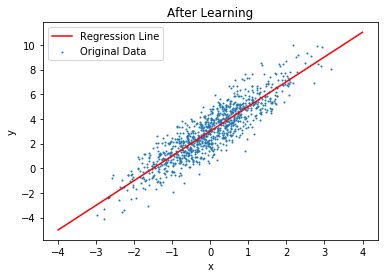

In [121]:
m = 0.00
c = 0.00
learning_rate = 0.01
for i in range(0,10000):
    m = m-learning_rate*grad_2(x,y,m,c)
    c = c-learning_rate*grad_1(x,y,m,c)
print(m)
print(c)
plt.scatter(x,y,s=1,marker = 'o',label='Original Data')
plt.plot(xi,m*xi+c,color = 'red',label = 'Regression Line')
plt.title('After Learning')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper left')
plt.show()

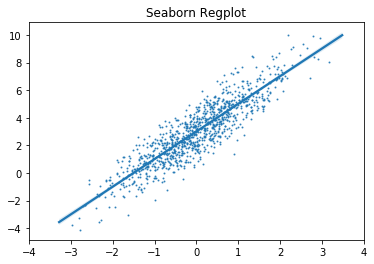

In [122]:
sns.regplot(x = x,y = y,fit_reg=True,scatter_kws={'marker':'o','s':1})
plt.title('Seaborn Regplot')
plt.xlim((-4,4))
plt.show()

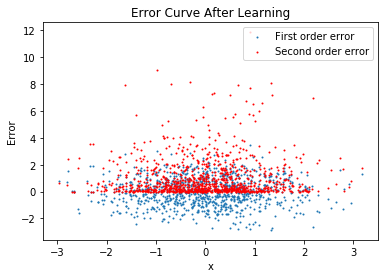

In [124]:
plt.scatter(x,error_1(x,y,m,c),marker = 'o',s = 1,label = 'First order error')
plt.scatter(x,error_2(x,y,m,c),marker = 'o',s = 1,label = 'Second order error',color = 'red')
plt.legend(loc = 'upper right')
plt.title('Error Curve After Learning')
plt.xlabel('x')
plt.ylabel('Error')
plt.show()

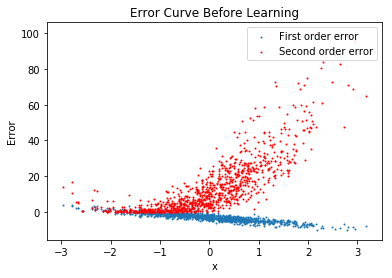

In [125]:
plt.scatter(x,error_1(x,y,0,0),marker = 'o',s = 1,label = 'First order error')
plt.scatter(x,error_2(x,y,0,0),marker = 'o',s = 1,label = 'Second order error',color = 'red')
plt.legend(loc = 'upper right')
plt.title('Error Curve Before Learning')
plt.xlabel('x')
plt.ylabel('Error')
plt.show()

# Closed Form Solution Of Regression

### Using Matrix Form;

In [172]:
X = x
Y = y
ones_arr = np.ones(1000)
type(ones_arr)
ones_arr.shape
X = np.vstack((ones_arr,X))
X = X.T
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [173]:
xt = X.T
print(xt.shape)

(2, 1000)


In [174]:
ans_1 = np.dot(xt,X)
ans_2 = np.dot(xt,Y)
inverse = np.linalg.inv(ans_1)
theta = np.dot(inverse,ans_2)
print(theta.shape)

(2,)


In [177]:
print('Following are the details of the regression model:')
print('Slope: '+str(theta[1]))
print('Intercept: '+str(theta[0]))

Following are the details of the regression model:
Slope: 2.0036334617908604
Intercept: 3.0094246623082013


## NOTE:

#### We can use similar closed form formula for Lowess (Locally Weighted) Regression.

# KNN ALGORITHM

### Generating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
x1 = np.random.normal(size = 50)
x2 = np.random.normal(size = 50) - 5
X = np.hstack((x1,x2))
print(X.shape)
c= 2*X + 3
noise1 = np.random.normal(size = 50)*5
noise2 = np.random.normal(size = 50)*3
noise = np.hstack((noise1,noise2))
c = c + noise
X =np.vstack((X,c))
print(X.shape)

(100,)
(2, 100)


In [49]:
y1 = np.zeros(50)
y2 = np.ones(50)
Y = np.hstack((y1,y2))
print(Y.shape)
data = np.vstack((X,Y))
print(data.shape)

(100,)
(3, 100)


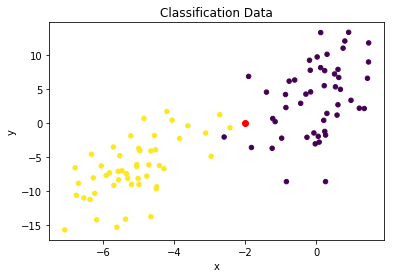

In [106]:
plt.scatter(data[0,:],data[1,:],s=20,c=data[2,:])
plt.plot([-2],[0],color ='red',marker = 'o')
plt.title('Classification Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### knn Algorithm:

In [53]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [111]:
def knn(X,Y,query_pt,k = 5):
    vals = []
    for i in range(0,100):
        vals.append([dist(query_pt,X[:,i]),Y[i]])
    vals = sorted(vals)
    vals = np.asarray(vals)
    arr = np.unique(vals[:5,1],return_counts=True)
    index = arr[1].argmax()
    print('The given query point belongs to the following group:')
    print(int(arr[0][index]))
    

In [112]:
knn(data[:2,:],data[2,:],[0,6])

The given query point belongs to the following group:
0


# FACE RECOGNITION USING PYTHON:

In [2]:
import cv2
import matplotlib.pyplot as plt

In [5]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\ABCD


In [6]:
img = cv2.imread('Bipasha.jpg')

In [7]:
print(img.shape)

(1600, 1067, 3)


In [8]:
print(type(img))

<class 'numpy.ndarray'>


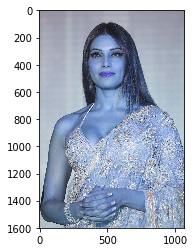

In [11]:
plt.imshow(img)
plt.show()

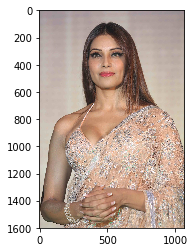

In [12]:
newimg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(newimg)
plt.show()

In [20]:
bb = cv2.imread('Bipasha.jpg')
cv2.imshow('Bipasha Basu',bb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
gray = cv2.imread('Bipasha.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('Gray Bipasha',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

[]

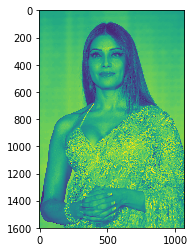

In [8]:
plt.imshow(gray)
plt.plot()

# Read a video stream from  a camera:

In [11]:
import cv2

In [18]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    if ret==False:
        continue
    gf = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow("Darker me",gf)
    if((cv2.waitKey(1) & 0xFF)==ord('e')):
        break
cap.release()
cv2.destroyAllWindows()

### Detecting face:

In [21]:
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = cascade_classifier.detectMultiScale(bb,1.3,5)
for (x,y,w,h) in faces:
    cv2.rectangle(bb,(x,y),(x+w,y+h),(0,0,255),2)
cv2.imshow('Beautiful Face',bb)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Detecting faces in a video:

In [26]:
cap = cv2.VideoCapture(0)
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
while True:
    ret,frame = cap.read()
    if ret==False:
        continue
    faces = cascade_classifier.detectMultiScale(frame,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
    cv2.imshow('Me bitches!!',frame)
    if((cv2.waitKey(1) & 0xFF)==ord('e')):
        break
cap.release()
cv2.destroyAllWindows()

# PROJECT

In [17]:
import numpy as np
import os
import cv2
address = './Face_data/'

In [26]:
address = './Face_data/'
file_name = input('Enter the name of the person: ')
cap = cv2.VideoCapture(0)
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
counter = 0
face_data=[]
while True:
    ret, frame = cap.read()
    if ret==False:
        continue
    faces = cascade_classifier.detectMultiScale(frame,1.3,5)
    faces = sorted(faces,key = lambda f: f[2]*f[3], reverse = True)
    offset = 10
    if(len(faces)==0):
        continue
    x,y,w,h = faces[0]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
    face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
    face_section = cv2.resize(face_section,(500,500))
    if(counter%10==0):
        face_data.append(face_section)
    counter+=1
    cv2.imshow('FRAME',frame)
    cv2.imshow('Face Section',face_section)
    if(len(face_data)==30):
        break
    if(cv2.waitKey(1) & 0xFF==ord('e')):
        break
cap.release()
cv2.destroyAllWindows()
face_data = np.asarray(face_data)
face_data = face_data.reshape((face_data.shape[0],-1))
np.save(address+file_name+'.npy',face_data)

Enter the name of the person: Harshit


### Building classifier for face detection using KNN Algorithm

In [25]:
################### Code for KNN Algorithm ####################
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def knn(X_train,X_test,k = 5):
    ans = []
    for arr in X_test:
        vals = []
        for i in X_train:
            vals.append((dist(arr,i[:-1]),i[-1]))
        vals = sorted(vals)
        vals = np.asarray(vals)
        inner = np.unique(vals[:5,1],return_counts=True)
        index = inner[1].argmax()
        ans.append(inner[0][index])
    return ans

In [12]:
class_id = 0
collected_data = []
labels = []
address = './Face_data/'

In [13]:
for fx in os.listdir(address):
    if fx.endswith('.npy'):
        print('Loaded '+ fx)
        data_item = np.load(address+fx)
        collected_data.append(data_item)
        target = class_id*np.ones(data_item.shape[0])
        class_id += 1
        labels.append(target)


Loaded Harshit.npy


In [14]:
face_dataset = np.concatenate(collected_data,axis=0)
face_labels = np.concatenate(labels,axis = 0).reshape((-1,1))

In [15]:
print(face_labels.shape)
print(face_dataset.shape)

(30, 1)
(30, 750000)


In [16]:
train_set = np.concatenate((face_dataset,face_labels),axis = 1)
print(train_set.shape)

(30, 750001)


In [3]:
import numpy as np
import cv2
import os

In [4]:
test_data = []
counter = 0

In [5]:
cascade_classifier = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    if ret==False:
        continue
    faces = cascade_classifier.detectMultiScale(frame,1.3,5)
    faces = sorted(faces,key = lambda f: f[2]*f[3], reverse = True)
    offset = 10
    if(len(faces)==0):
        continue
    x,y,w,h = faces[0]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
    face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
    face_section = cv2.resize(face_section,(500,500))
    if(counter%10==0):
        test_data.append(face_section)
    counter+=1
    cv2.imshow('FRAME',frame)
    cv2.imshow('Face Section',face_section)
    if(len(test_data)==30):
        break
    if(cv2.waitKey(1) & 0xFF==ord('e')):
        break
cap.release()
cv2.destroyAllWindows()
test_data = np.asarray(test_data)


In [6]:
print(test_data.shape)

(30, 500, 500, 3)


In [7]:
test_data = test_data.reshape((test_data.shape[0],-1))

In [34]:
ans= knn(train_set,test_data)
print(len(ans))

30


In [36]:
print(ans)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
ans= np.unique(ans,return_counts=True)
print(ans)

(array([0.]), array([30], dtype=int64))


In [40]:
diction = {0:"Harshit"}

In [41]:
index = ans[1].argmax()
group = ans[0][index]
print("The person is: "+diction[group])

The person is: Harshit


In [42]:
########################## Here is the conclusion of the  project.. ###################################

# NATURAL LANGUAGE PROCESSING:

In [43]:
# NLP Basics

In [44]:
import nltk

In [47]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## BASIC NLP PIPELINE:

In [50]:
text = 'Hello! My name is Harshit Dahiya. I am 21 years old. My e-mail id is harshitd24680@gmail.com'
print(text)

Hello! My name is Harshit Dahiya. I am 21 years old. My e-mail id is harshitd24680@gmail.com


### Tokenization

In [51]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [52]:
print(sent_tokenize(text))
print(type(sent_tokenize(text)))

['Hello!', 'My name is Harshit Dahiya.', 'I am 21 years old.', 'My e-mail id is harshitd24680@gmail.com']
<class 'list'>


In [53]:
print(word_tokenize(text))
print(len(word_tokenize(text)))

['Hello', '!', 'My', 'name', 'is', 'Harshit', 'Dahiya', '.', 'I', 'am', '21', 'years', 'old', '.', 'My', 'e-mail', 'id', 'is', 'harshitd24680', '@', 'gmail.com']
21


In [71]:
words_text = word_tokenize(text.lower())

### Stopword Removal

In [55]:
from nltk.corpus import stopwords

In [56]:
print(type(stopwords.words('english')))

<class 'list'>


In [58]:
sw = stopwords.words('english')
print(len(sw))

179


In [72]:
important_words = [w for w in words_text if w not in sw]
print(len(important_words))

15


In [73]:
print(important_words)

['hello', '!', 'name', 'harshit', 'dahiya', '.', '21', 'years', 'old', '.', 'e-mail', 'id', 'harshitd24680', '@', 'gmail.com']


### Tokenization using Regular Expression:

Word Tokenizer can't handle complex tokenizations. So, we use a Regexp Tokenizer Class in NLTK

In [74]:
from nltk.tokenize import RegexpTokenizer

In [78]:
tokenizer = RegexpTokenizer('[a-zA-Z@]+')
more_imp_words = tokenizer.tokenize(text)
print(more_imp_words)

['hello', 'my', 'name', 'is', 'harshit', 'dahiya', 'i', 'am', 'years', 'old', 'my', 'e', 'mail', 'id', 'is', 'harshitd', '@gmail', 'com']


### Stemming

Changing the words into their radical forms is called Stemming.

In [82]:
from nltk.stem import PorterStemmer

In [84]:
ps = PorterStemmer()
ps.stem('teenager')

'teenag'

In [85]:
from nltk.stem import LancasterStemmer

In [86]:
ls = LancasterStemmer()
ls.stem('teenager')

'teen'

In [87]:
from nltk.stem import SnowballStemmer

In [89]:
ss = SnowballStemmer('english')
ss.stem('teenager')

'teenag'

#### NOTE:
Using SnowballStemmer we can do stemming in various languages, rest are only for English.

## Bag of Words Model using SciKit-learn:

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
txt = ['The quick brown fox jumped over the lazy dog.']
vectorizer = CountVectorizer()
vectorizer.fit(txt)
print(vectorizer.vocabulary_)
print(type(vectorizer.vocabulary_))

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
<class 'dict'>


In [95]:
vector = vectorizer.transform(txt)
print(type(vector))
print(vector.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(1, 8)


In [96]:
print(vector)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	2


In [97]:
vector = vector.toarray()
print(type(vector))
print(vector.shape)
print(vector)

<class 'numpy.ndarray'>
(1, 8)
[[1 1 1 1 1 1 1 2]]


In [103]:
text_barcelona_from_net = "They chose eight players to undergo testing before the LaLiga opener against Athletic Club. Those eight were Ter Stegen, Piqué, Iván Rakitic, Todibo, Messi, Sergi Roberto, Junior and Carles Pérez. All football teams are subject to these obligatory tests and the visits don't have to be pre-planned. The results of these tests are as yet unknown but no one is envisaging for there to be any problems."

In [104]:
from nltk.tokenize import sent_tokenize
tkd_txt = sent_tokenize(text_barcelona_from_net)
print(type(tkd_txt))
print(len(tkd_txt))
print(tkd_txt)

<class 'list'>
4
['They chose eight players to undergo testing before the LaLiga opener against Athletic Club.', 'Those eight were Ter Stegen, Piqué, Iván Rakitic, Todibo, Messi, Sergi Roberto, Junior and Carles Pérez.', "All football teams are subject to these obligatory tests and the visits don't have to be pre-planned.", 'The results of these tests are as yet unknown but no one is envisaging for there to be any problems.']


In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
vectorizer = CountVectorizer()
vectorizer.fit(tkd_txt)
print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))

{'they': 48, 'chose': 11, 'eight': 14, 'players': 31, 'to': 50, 'undergo': 52, 'testing': 43, 'before': 8, 'the': 45, 'laliga': 22, 'opener': 28, 'against': 0, 'athletic': 6, 'club': 12, 'those': 49, 'were': 55, 'ter': 42, 'stegen': 39, 'piqué': 29, 'iván': 20, 'rakitic': 35, 'todibo': 51, 'messi': 23, 'sergi': 38, 'roberto': 37, 'junior': 21, 'and': 2, 'carles': 10, 'pérez': 34, 'all': 1, 'football': 16, 'teams': 41, 'are': 4, 'subject': 40, 'these': 47, 'obligatory': 25, 'tests': 44, 'visits': 54, 'don': 13, 'have': 18, 'be': 7, 'pre': 32, 'planned': 30, 'results': 36, 'of': 26, 'as': 5, 'yet': 56, 'unknown': 53, 'but': 9, 'no': 24, 'one': 27, 'is': 19, 'envisaging': 15, 'for': 17, 'there': 46, 'any': 3, 'problems': 33}
57


In [113]:
vector = vectorizer.transform(tkd_txt)
print(type(vector))
print(vector.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(4, 57)


In [114]:
vector_arr = vector.toarray()
print(vector_arr.shape)
print(type(vector_arr))
print(vector_arr)

(4, 57)
<class 'numpy.ndarray'>
[[1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1
  0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
  0 0 0 0 1 1 0 0 1 1 0 1 0 0 2 0 0 0 1 0 0]
 [0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0
  1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1]]


# NAIVE BAYES CLASSIFIER:

## Mushroom Dataset

In [115]:
import numpy as np
import pandas as pd

In [122]:
loaded_ds = pd.read_csv('./DataSets/mushrooms.csv')
print(type(loaded_ds))
print(loaded_ds.shape)
loaded_ds.head()

<class 'pandas.core.frame.DataFrame'>
(8124, 23)


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now, we need to convert the categorical values into numerical values.

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [126]:
le_object = LabelEncoder()
digitalized_data = loaded_ds.apply(le_object.fit_transform)
digitalized_data.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [130]:
digitalized_data = np.asarray(digitalized_data)
print(type(digitalized_data))
print(digitalized_data.shape)

<class 'numpy.ndarray'>
(8124, 23)


In [131]:
x_data = digitalized_data[:,1:]
y_data = digitalized_data[:,0]
print(x_data.shape)
print(y_data.shape)

(8124, 22)
(8124,)


In [134]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size = 0.8,test_size = 0.2)

## Building Naive Bayes Classifier Model:

In [139]:
def prior_prob(y_train,label):
    a = np.sum(y_train==label)
    b = y_train.shape[0]
    return a/float(b)

In [165]:
def part_llhood(x_train,y_train,col,col_val,label):
    a = np.sum(y_train == label)
    b = np.sum(np.logical_and(x_train[:,col]==col_val,y_train==label))
    return b/float(a)

In [171]:
def pred_naive_classifier(x_train,y_train,x_test_single):
    no_of_features = x_train.shape[1]
    no_of_mushrooms = x_train.shape[0]
    labels = np.unique(y_train)
    pred_probab = []
    for label in labels:
        prior = prior_prob(y_train,label)
        likelihood = 1
        for x in range(0,no_of_features):
            likelihood *= part_llhood(x_train,y_train,x,x_test_single[x],label)
        px = prior*likelihood
        pred_probab.append([px,label])
    pred_probab = np.asarray(pred_probab)
    index = pred_probab[:,0].argmax()
    predicted_label = pred_probab[index][1]
    return int(predicted_label)

In [174]:
def accuracy_score(x_train,y_train,x_test,y_test):
    size_test_set = x_test.shape[0]
    predictions = []
    for i in range(0,size_test_set):
        predictions.append(pred_naive_classifier(x_train,y_train,x_test[i,:]))
    predictions = np.asarray(predictions)
    numerator = np.sum(predictions==y_test)
    return numerator/float(size_test_set)

## Result of Naive Bayes Classifier Model:

In [176]:
acc = accuracy_score(x_train,y_train,x_test,y_test)

In [177]:
print("The accuracy of our Naive Bayes Classifier Model on the test data is "+str(float(acc*100)) + " percent.")

The accuracy of our Naive Bayes Classifier Model on the test data is 99.50769230769231 percent.


# Logistic Regression
### On same data set of mushrooms.
We will compare the results of both logistic ans naive bayes for classification problem.
We can perform logistic regression on this dataset because there are only two labels of mushroom.

This time using sci-kit learn:

In [178]:
from sklearn.linear_model import LogisticRegression

In [181]:
reg_object = LogisticRegression()
reg_object.fit(x_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
pred_logreg = reg_object.predict(x_test)

In [184]:
print(type(pred_logreg))
print(pred_logreg.shape == y_test.shape)

<class 'numpy.ndarray'>
True


In [186]:
p = np.sum(pred_logreg==y_test)
q = y_test.shape[0]
result = p/float(q)

In [187]:
print("The accuracy of our Logistic Regression Model on the test data is "+str(float(result*100)) + " percent.")

The accuracy of our Logistic Regression Model on the test data is 94.95384615384616 percent.


## NOTE:
For the given dataset, Naive Bayes Classifier Model beats the Logistic Regression Model comfortably.

# Multinomial vs Gaussian Naive Bayes Classifier:

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [4]:
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [5]:
x_data = digits.data
y_data = digits.target

In [7]:
print(type(x_data))
print(type(y_data))
print(x_data.shape)
print(y_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1797, 64)
(1797,)


### VISUALIZING DATASET:

Enter the index:17


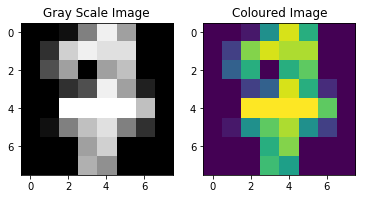

The label of this figure is 7.


In [26]:
index = int(input('Enter the index:'))
plt.subplot(1,2,1)
plt.title('Gray Scale Image')
plt.imshow(x_data[index].reshape((8,8)),cmap='gray')
plt.subplot(1,2,2)
plt.title('Coloured Image')
plt.imshow(x_data[index].reshape((8,8)))
plt.show()
print('The label of this figure is '+str(y_data[index])+'.')

Note that the features are discrete but they are not binary so we can't use Bernoulli's Multivariate Naive Bayes Model.

### Training models:

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [10]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [11]:
mnb.fit(x_data,y_data)
gnb.fit(x_data,y_data)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
mnb_acc = mnb.score(x_data,y_data)
gnb_acc = gnb.score(x_data,y_data)
print("Multinomial Model Accuracy: "+str(mnb_acc*100)+" percent.")
print("Gaussian Model Accuracy: "+str(gnb_acc*100)+" percent.")

Multinomial Model Accuracy: 90.53978853644963 percent.
Gaussian Model Accuracy: 85.80968280467445 percent.


#### Using Cross-Validation:

In [15]:
cv_mnb = cross_val_score(mnb,x_data,y_data,scoring='accuracy',cv=10).mean()
cv_gnb = cross_val_score(gnb,x_data,y_data,scoring='accuracy',cv=10).mean()
print(cv_mnb)
print(cv_gnb)

0.8819396216300838
0.8103537583567821


### RESULT:
Since, the dataset has discrete features. Hence, Multinomial Naive Bayes Model triumphs over Gaussian Naive Bayes Model.

# PRACTICE FILE OPENING:

In [27]:
f = open('My_text.txt','w+')

In [28]:
f.write('Hello! My name is Harshit Dahiya. I love analytics and ml. I am 21 years old. I love to play football.')

102

In [29]:
f.close()

In [30]:
f = open('My_text.txt','a')
f.write('\n This text file was created using Python Code.\n')
f.close()

#### Reading Mode:

In [34]:
x = []
f = open('My_text.txt','r')
if(f.mode=='r'):
    for i in f.readlines():
        x.append(i)
f.close()

In [35]:
print(len(x))

2


In [36]:
print(x)

['Hello! My name is Harshit Dahiya. I love analytics and ml. I am 21 years old. I love to play football.\n', ' This text file was created using Python Code.\n']


# PROJECT:

### Predicting the quality of IMDb movies using reviews of viewers.
We will implement NLP Pipeline.

1. Load input files and read reviews
2. Tokenize
3. Removing Stopwords
4. Performing Stemming
5. Write cleaned data to a new file

In [52]:
f = open('imdb_trainX.txt',mode = 'r',encoding = 'utf-8')
g = open('cleaned_trainX.txt',mode = 'w+',encoding = 'utf-8')
print(f)

<_io.TextIOWrapper name='imdb_trainX.txt' mode='r' encoding='utf-8'>


In [53]:
if(f.mode=='r'):
    for x in f.readlines():
        x = x.lower()
        x = x.replace('<br /><br />',' ')
        g.write(x)
f.close()
g.close()

In [59]:
f = open('cleaned_trainX.txt',mode = 'r',encoding='utf-8')
x_train = []
for i in f.readlines():
    x_train.append(i)
f.close()

In [68]:
print(type(x_train[0]))
print(type(x_train))
print(len(x_train))

<class 'str'>
<class 'list'>
25000


In [65]:
f = open('imdb_trainY.txt',mode = 'r',encoding='utf-8')
y_train = []
for i in f.readlines():
    y_train.append(int(i))
f.close()

In [67]:
print(type(y_train[0]))
print(type(y_train))
print(len(y_train))

<class 'int'>
<class 'list'>
25000


x_train and y_train are training sets. x_train needs further cleaning.

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [71]:
sw = stopwords.words('english')
print(type(sw))

<class 'list'>


In [89]:
tokenizer = RegexpTokenizer('[a-zA-Z]+')
tokenized_x_train = []
for i in x_train:
    tokenized_x_train.append(tokenizer.tokenize(i))

In [96]:
cleaned_x_train = []
for i in tokenized_x_train:
    swr = [w for w in i if w not in sw]
    cleaned_x_train.append(swr)

In [132]:
sts_x_train = []
ps = PorterStemmer()
for i in cleaned_x_train:
    temp = []
    for word in i:
        temp.append(ps.stem(word))
    sts_x_train.append(temp)

In [134]:
print(len(sts_x_train))
print(sts_x_train[0])

25000
['love', 'movi', 'sinc', 'saw', 'open', 'day', 'touch', 'beauti', 'strongli', 'recommend', 'see', 'movi', 'watch', 'famili', 'far', 'mpaa', 'rate', 'pg', 'themat', 'element', 'prolong', 'scene', 'disastor', 'nuditi', 'sexual', 'languag']


### sts_x_train contains cleaned and ready to use x_train and y_train contains labels

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

In [135]:
usable_data=[]
for i in sts_x_train:
    stri = ' '.join(i)
    usable_data.append(stri)

In [136]:
print(type(usable_data[0]))

<class 'str'>


In [140]:
vectorizer = CountVectorizer()
vectorizer.fit(usable_data)
print(len(vectorizer.vocabulary_))

49642


In [142]:
dictionary = vectorizer.vocabulary_

In [146]:
print(dictionary['love'])

25607


### NOTE:
We get the length of the vocabulary to be 49642.

In [147]:
vector = vectorizer.transform(usable_data)
print(type(vector))
print(vector.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(25000, 49642)


In [148]:
vector_arr = vector.toarray()
print(type(vector_arr))
print(vector_arr.shape)
print(vector_arr[0])

<class 'numpy.ndarray'>
(25000, 49642)
[0 0 0 ... 0 0 0]


In [150]:
print(vector_arr[0].max())

2


Since, the features are clearly not binary, therefore we cannot use Multivariate Bernoulli Naive Bayes Event Model.
Thus, using Multinomial Naive Bayes model: (Note that features are discrete)

# Prediction using Self-written code:

In [151]:
def prior_prob(y_train,label):
    a = np.sum(y_train==label)
    b = y_train.shape[0]
    return a/float(b)

In [152]:
def part_llhood(x_train,y_train,col,col_val,label):
    a = np.sum(y_train == label)
    b = np.sum(np.logical_and(x_train[:,col]==col_val,y_train==label))
    return b/float(a)

In [155]:
def pred_naive_classifier(x_train,y_train,x_test_single):
    no_of_features = x_train.shape[1]
    labels = np.unique(y_train)
    pred_probab = []
    for label in labels:
        prior = prior_prob(y_train,label)
        likelihood = 1
        for x in range(0,no_of_features):
            likelihood *= part_llhood(x_train,y_train,x,x_test_single[x],label)
        px = prior*likelihood
        pred_probab.append([px,label])
    pred_probab = np.asarray(pred_probab)
    index = pred_probab[:,0].argmax()
    predicted_label = pred_probab[index][1]
    return int(predicted_label)

In [156]:
def NB_classifier(x_train,y_train,x_test):
    size_test_set = x_test.shape[0]
    predictions = []
    for i in range(0,size_test_set):
        predictions.append(pred_naive_classifier(x_train,y_train,x_test[i,:]))
    predictions = np.asarray(predictions)
    return predictions

In [185]:
print(y_train[0])

10


In [184]:
y_train = np.asarray(y_train)
x = pred_naive_classifier(vector_arr[:,:10000],y_train,vector_arr[0,:10000])
print(x)

10


## NOTE:
Here we considered only 10,000 features and just one test example because the computation is taking very long.

# Prediction using Sci-kit Learn:

In [186]:
from sklearn.naive_bayes import MultinomialNB

In [187]:
mnb = MultinomialNB()
mnb.fit(vector_arr,y_train)

KeyboardInterrupt: 

# K MEANS ALGORITHM:

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
X,labels = make_blobs(n_samples=500,n_features=2,centers=3,random_state=10)

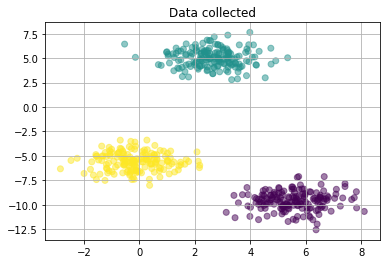

In [5]:
plt.scatter(X[:,0],X[:,1],c = labels,alpha=0.5)
plt.grid()
plt.title('Data collected')
plt.show()

In [6]:
def euclidean_dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [7]:
###     Do not run this cell again, because we haven't set the random_state yet ####
cluster_means = {}
for i in range(3):
    cluster_means[i+1]=[random.randrange(int(X[:,0].min()),int(X[:,0].max())),random.randrange(int(X[:,1].min()),int(X[:,1].max()))]

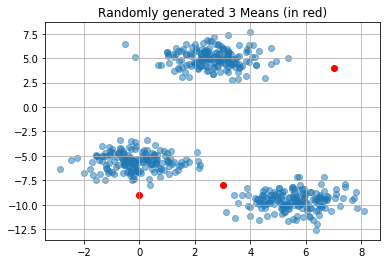

In [8]:
plt.scatter(X[:,0],X[:,1],alpha = 0.5)
for i in cluster_means.keys():
    plt.scatter(cluster_means[i][0],cluster_means[i][1],c = 'red')
plt.title('Randomly generated 3 Means (in red)')
plt.grid()
plt.show()

In [9]:
colors = {1:'red',2:'green',3:'blue'}

In [18]:
pointsandlabels = []
for data_point in X:
    distance_from_means = []
    for i in cluster_means.keys():
        distance_from_means.append([euclidean_dist(cluster_means[i],data_point),i])
    distance_from_means = sorted(distance_from_means)
    pointsandlabels.append([data_point[0],data_point[1],distance_from_means[0][1]])

In [11]:
print(len(pointsandlabels[0]))
print(type(pointsandlabels[0]))

3
<class 'list'>


### Calculating mean of a cluster and re-locating the cluster mean point:

In [19]:
sum_1 = [0,0]
sum_2 = [0,0]
sum_3 = [0,0]
count_1 = 0
count_2 = 0
count_3 = 0

for pt in pointsandlabels:
    if pt[2]==1:
        sum_1[0] = sum_1[0] + pt[0]
        sum_1[1] = sum_1[1] + pt[1]
        count_1 += 1
    elif pt[2]==2:
        sum_2[0] = sum_2[0] + pt[0]
        sum_2[1] = sum_2[1] + pt[1]
        count_2 += 1
    elif pt[2]==3:
        sum_3[0] = sum_3[0] + pt[0]
        sum_3[1] = sum_3[1] + pt[1]
        count_3 += 1
### new means update:
cluster_means[1] = [sum_1[0]/count_1,sum_1[1]/count_1]
cluster_means[2] = [sum_2[0]/count_2,sum_2[1]/count_2]
cluster_means[3] = [sum_3[0]/count_3,sum_3[1]/count_3]

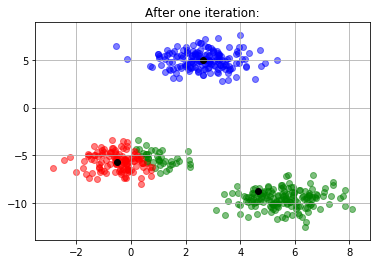

In [14]:
for pt in pointsandlabels:
    plt.scatter(pt[0],pt[1],color = colors[pt[2]],alpha = 0.5)
for i in cluster_means.keys():
    plt.scatter(cluster_means[i][0],cluster_means[i][1],color = 'black')
plt.grid()
plt.title('After one iteration:')
plt.show()

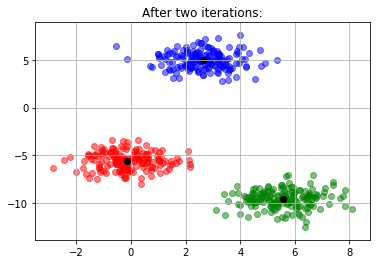

In [17]:
for pt in pointsandlabels:
    plt.scatter(pt[0],pt[1],color = colors[pt[2]],alpha = 0.5)
for i in cluster_means.keys():
    plt.scatter(cluster_means[i][0],cluster_means[i][1],color = 'black')
plt.grid()
plt.title('After two iterations:')
plt.show()

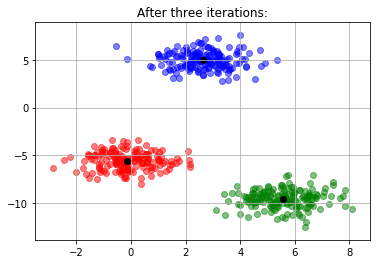

In [20]:
for pt in pointsandlabels:
    plt.scatter(pt[0],pt[1],color = colors[pt[2]],alpha = 0.5)
for i in cluster_means.keys():
    plt.scatter(cluster_means[i][0],cluster_means[i][1],color = 'black')
plt.grid()
plt.title('After three iterations:')
plt.show()

### NOTE:
Since, there is no further change in the position of the group means, we don't need to go further. We already have the clusters.

## K-Means using sk-learn

It uses k-means++ for better initialization of the cluster means..

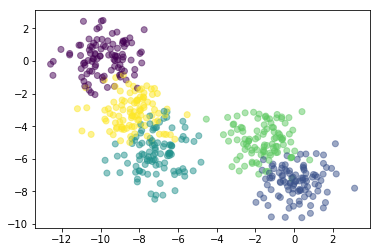

In [26]:
X,labels = make_blobs(n_samples=500,n_features=2,centers=5,random_state=9)
plt.scatter(X[:,0],X[:,1],c=labels,alpha=0.5)
plt.show()

In [27]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans(n_clusters=5)

In [29]:
km.fit(X,labels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
cluster_centers = km.cluster_centers_

In [33]:
print(type(cluster_centers))
print(cluster_centers)

<class 'numpy.ndarray'>
[[-8.20996787 -3.22832048]
 [ 0.07021557 -7.3303871 ]
 [-7.07693136 -5.89060814]
 [-9.83458483  0.13632813]
 [-1.71316917 -4.74551114]]


In [37]:
pred = km.labels_

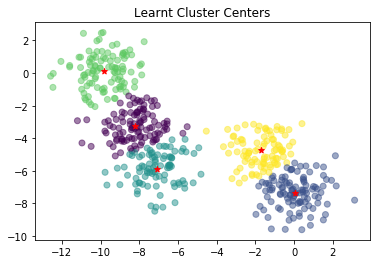

In [39]:
plt.scatter(X[:,0],X[:,1],c=pred,alpha=0.5)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='*',c='red')
plt.title('Learnt Cluster Centers')
plt.show()

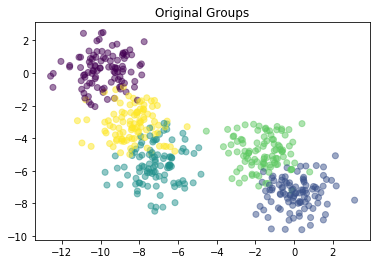

In [36]:
plt.scatter(X[:,0],X[:,1],c=labels,alpha=0.5)
plt.title('Original Groups')
plt.show()

## Note:
This works pretty well for linearly seperable data. But it is not recommended for linearly unseparable data.

### K-Means for Linearly Unseparable Data:

Consider moons dataset;

In [40]:
from sklearn.datasets import make_moons

In [46]:
X,labels = make_moons(n_samples=500,noise=0.10,random_state=98)

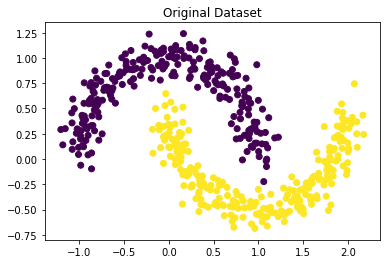

In [47]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.title('Original Dataset')
plt.show()

In [48]:
from sklearn.cluster import KMeans

In [49]:
km = KMeans?

In [50]:
km = KMeans(n_clusters=2)

In [51]:
km.fit(X,labels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
cluster_centers = km.cluster_centers_

In [53]:
new_labels = km.labels_

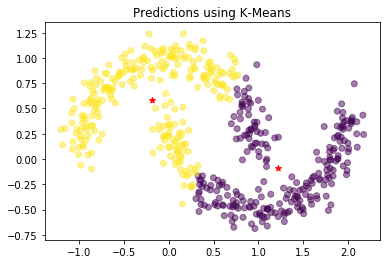

In [54]:
plt.scatter(X[:,0],X[:,1],c=new_labels,alpha=0.5)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='*',c='red')
plt.title('Predictions using K-Means')
plt.show()

## Note:
Clearly, Kmeans algorithm was not able to separate the clusters. Therefore for such a dataset we use DBSCAN Algorithm

# DBSCAN
Density Based Spatial Clustering of Applications with Noise

In [55]:
from sklearn.cluster import DBSCAN
db = DBSCAN?

In [72]:
db = DBSCAN(eps = 0.15,min_samples=5)
db.fit(X,labels)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [73]:
new_labels = db.labels_

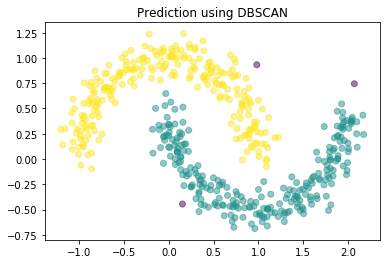

In [74]:
plt.scatter(X[:,0],X[:,1],c=new_labels,alpha=0.5)
plt.title('Prediction using DBSCAN')
plt.show()

## Note:
Apart from few points, the clustering is almost perfect for eps = 0.15 using DBSCAN.
Thus, this method is used for clustering the data which is not linearly seperable.

# PROJECT:

## Image segmentation using K-Means:

In [71]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [120]:
im = cv2.imread('sunset.jpg')

In [121]:
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(275, 183, 3)


In [106]:
### Viewing image using cv2
cv2.imshow('Sunset',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

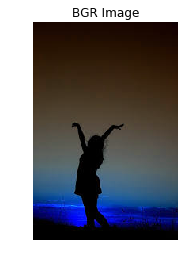

In [122]:
### Viewing image using matplotlib
plt.imshow(im)
plt.axis('off')
plt.title('BGR Image')
plt.show()

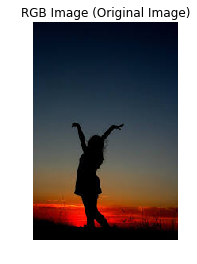

In [123]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.title('RGB Image (Original Image)')
plt.show()

In [124]:
im = im.reshape((-1,3))
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(50325, 3)


In [125]:
num_of_colours = 10
km = KMeans(n_clusters=num_of_colours)

In [126]:
km.fit(im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
dominant_colours = km.cluster_centers_
print(type(dominant_colours))
print(dominant_colours)

<class 'numpy.ndarray'>
[[ 52.5436828   67.91102151  79.83037634]
 [  2.94105866  15.96537911  35.82851693]
 [126.87769614 100.690685    66.01659161]
 [142.69695044  15.99174079   3.9021601 ]
 [ 22.60734665  41.97158821  60.55694246]
 [ 89.95807949  93.80823905  89.69495213]
 [224.11764706  32.21193772   5.79930796]
 [  2.71549469   0.92660409   1.42898908]
 [149.41747573  77.01059135  18.12533098]
 [ 83.02028986   7.12826087   3.9673913 ]]


In [128]:
labels = km.labels_

In [129]:
print(type(labels))
print(labels.shape)

<class 'numpy.ndarray'>
(50325,)


In [130]:
dup_im = np.copy(im)

In [131]:
for i in range(im.shape[0]):
    for j in range(num_of_colours):
        if labels[i] == j:
            dup_im[i] = dominant_colours[j]
            break

In [132]:
print(type(dup_im))
print(dup_im.shape)

<class 'numpy.ndarray'>
(50325, 3)


In [133]:
dup_im = dup_im.reshape((275,183,3))
im = im.reshape((275,183,3))

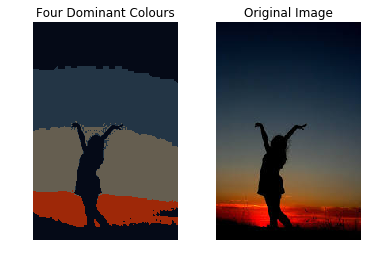

In [87]:
plt.subplot(1,2,1)
plt.imshow(dup_im)
plt.axis('off')
plt.title('Four Dominant Colours')
plt.subplot(1,2,2)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')
plt.show()

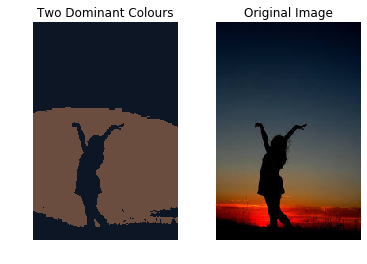

In [103]:
plt.subplot(1,2,1)
plt.imshow(dup_im)
plt.axis('off')
plt.title('Two Dominant Colours')
plt.subplot(1,2,2)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')
plt.show()

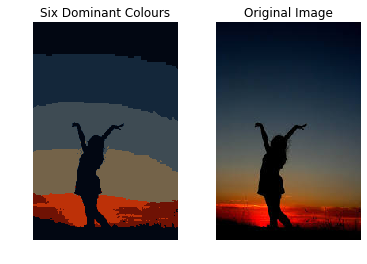

In [119]:
plt.subplot(1,2,1)
plt.imshow(dup_im)
plt.axis('off')
plt.title('Six Dominant Colours')
plt.subplot(1,2,2)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')
plt.show()

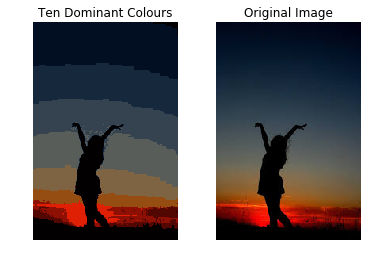

In [134]:
plt.subplot(1,2,1)
plt.imshow(dup_im)
plt.axis('off')
plt.title('Ten Dominant Colours')
plt.subplot(1,2,2)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')
plt.show()

### Printing Colour Swatches:
Let us print the swatch for the last case, ie., for ten dominating colours.

In [135]:
fig = plt.figure?

In [165]:
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [166]:
a = np.zeros((4,3),dtype = 'uint8')
print(type(a))
print(a.shape)

<class 'numpy.ndarray'>
(4, 3)


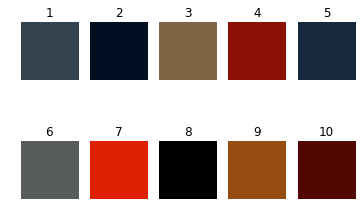

In [170]:
for i in range(num_of_colours):
    plt.subplot(2,5,i+1)
    for j in range(4):
        a[j] = dominant_colours[i]
    plt.imshow(a.reshape((2,2,3)))
    plt.title(i+1)
    plt.axis('off')
plt.show()

### NOTE:
These were the ten colours found to be dominating by our K-Means Algorithm and we have already seen the corresponding transformed image.

In [171]:
################################ This concludes the project on Image Segmentation ###################################

# SVM

## Support Vector Machines implementation using Pegasos Formulation:

#### Generating Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

In [2]:
X,labels = make_classification?

In [9]:
X,labels = make_classification(n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,n_classes=2,random_state=3)

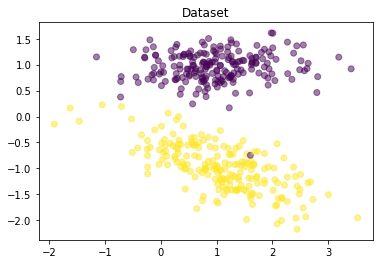

In [13]:
plt.scatter(X[:,0],X[:,1],c=labels,alpha = 0.5)
plt.title('Dataset')
plt.show()

In [57]:
############ Because there must be only two classes one positive and one negative  #####################
labels[labels==0]=-1

In [85]:
################## Initialization...
w = np.zeros((2))
print(w.shape)
b = 0.0
c = 100.0 
##### c is penalty for error....

(2,)


In [86]:
def loss(X,labels,w,b,c):
    l = 0
    l += 0.5*(np.dot(w.T,w))
    for i in range(X.shape[0]):
        l += c*(max(0,1-labels[i]*(np.dot(w.T,X[i])+b)))
    return l

In [87]:
def grad_w(X,labels,w,b,c):
    g = np.zeros(w.shape)
    g += w
    for i in range(X.shape[0]):
        if labels[i]*(np.dot(w.T,X[i])+b) >= 1:
            g += np.zeros(w.shape)
        elif labels[i]*(np.dot(w.T,X[i])+b) < 1:
            g -= c*labels[i]*X[i]
    return g

In [88]:
def grad_b(X,labels,w,b,c):
    g = 0
    for i in range(X.shape[0]):
        if labels[i]*(np.dot(w.T,X[i])+b) >= 1:
            g += 0
        elif labels[i]*(np.dot(w.T,X[i])+b) < 1:
            g -= c*labels[i]
    return g

In [89]:
loss_array = []

In [90]:
def grad_descent(X,labels,w,b,c,learning_rate = 0.001,repeat_times = 500):
    for i in range(repeat_times):
        first = np.zeros(w.shape)
        first = grad_w(X,labels,w,b,c)
        second = grad_b(X,labels,w,b,c)
        w = w - learning_rate*first
        b = b - learning_rate*second
        l = loss(X,labels,w,b,c)
        loss_array.append(l)
    return w,b

In [91]:
w,b = grad_descent(X,labels,w,b,c)

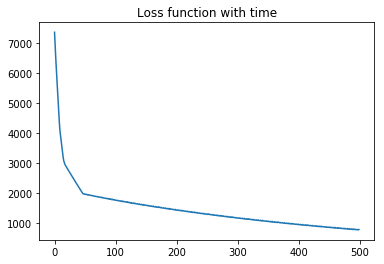

In [92]:
plt.plot(loss_array)
plt.title('Loss function with time')
plt.show()

### Note:
The loss function decreases as our model starts to learn about our data gradually.

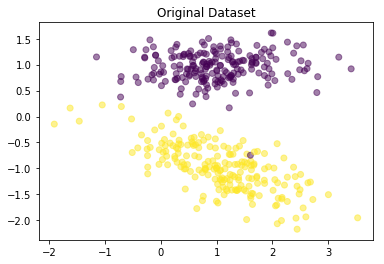

In [93]:
plt.scatter(X[:,0],X[:,1],c = labels,alpha = 0.5)
plt.title('Original Dataset')
plt.show()

In [67]:
x1 = np.linspace?

In [ ]:
x1 = np.linspace

In [94]:
x1 = np.linspace(-2,4,25)
x2 = ((x1*w[0] + b)/w[1])*-1
xn = ((x1*w[0] + b+1)/w[1])*-1
xp = ((x1*w[0] + b-1)/w[1])*-1

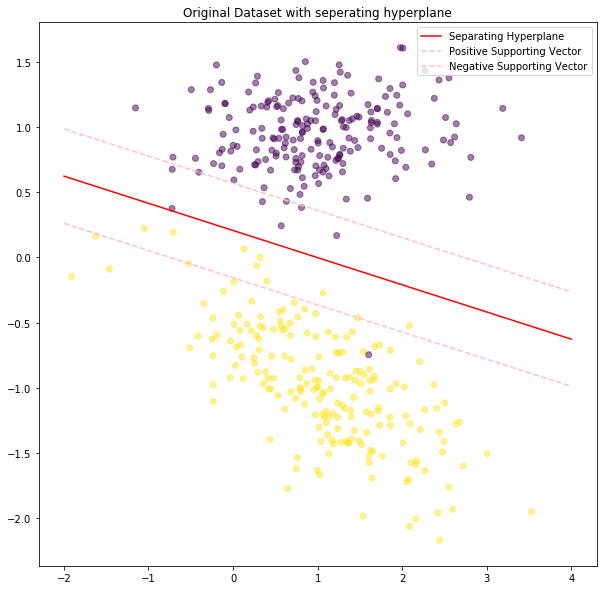

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c = labels,alpha = 0.5)
plt.title('Original Dataset with seperating hyperplane')
plt.plot(x1,x2,c='red',label = 'Separating Hyperplane')
plt.plot(x1,xp,'--',c='pink',label = 'Positive Supporting Vector')
plt.plot(x1,xn,'--',c='pink',label = 'Negative Supporting Vector')
plt.legend(loc = 'upper right')
plt.show()

## Note:
There still remains some outliers but we can take care of outliers using larger c that is the penalty hyper parameter.

In [76]:
################# This was the implementation of Support Vector Machine by Pegasos Formulation of the problem ################

In [83]:
################# Changing c can help in increasing or decreasing the confidence level #####################

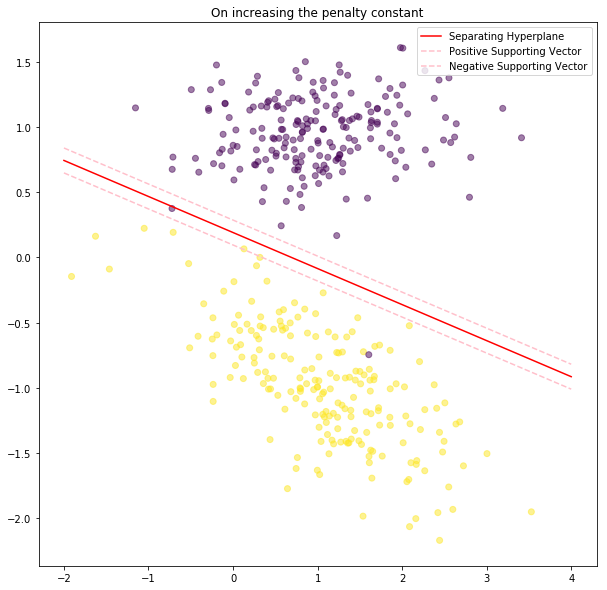

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c = labels,alpha = 0.5)
plt.title('On increasing the penalty constant')
plt.plot(x1,x2,c='red',label = 'Separating Hyperplane')
plt.plot(x1,xp,'--',c='pink',label = 'Positive Supporting Vector')
plt.plot(x1,xn,'--',c='pink',label = 'Negative Supporting Vector')
plt.legend(loc = 'upper right')
plt.show()

### Note:
Note that the confidence range is decreased and the w and b are changed when we increased the penalty constant.

# Plotting 3d plots:

In [1]:
from mpl_toolkits import mplot3d

In [2]:
import numpy as np
import matplotlib.pyplot as plt

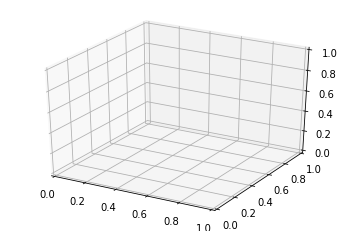

In [3]:
ax = plt.axes(projection = '3d')
plt.show()

In [4]:
print(type(ax))
print(ax)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>
Axes3DSubplot(0.125,0.125;0.775x0.755)


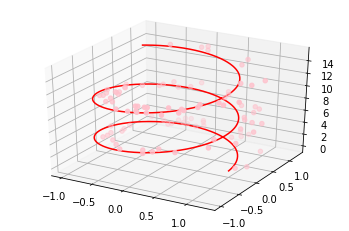

In [5]:
ax = plt.axes(projection = '3d')
z_line = np.linspace(0,15,1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)

z_points = 15*np.random.random(100)
x_points = np.cos(z_points) + 0.3*np.random.random(100)
y_points = np.sin(z_points) + 0.3*np.random.random(100)
ax.scatter3D(x_points,y_points,z_points,c = 'pink')
ax.plot3D(x_line,y_line,z_line,c='red')
plt.show()

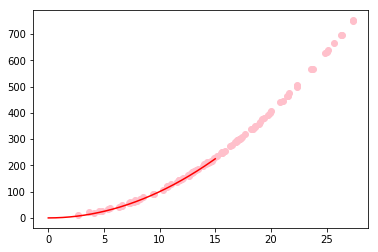

In [6]:
a1 = plt.axes()
x_line = np.linspace(0,15,1000)
y_line = x_line**2
x_points = 15*np.random.random(100) + 16*np.random.random(100)
y_points = x_points**2 + 9*np.random.random(100)
a1.scatter(x_points,y_points,c='pink')
a1.plot(x_line,y_line,c='red')
plt.show()

# SVM FOR NON-LINEAR DATA:

In [8]:
from sklearn.datasets import make_circles

In [9]:
X,Y = make_circles?

In [31]:
X,Y = make_circles(n_samples=400,noise = 0.08,factor = 0.7)

In [32]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


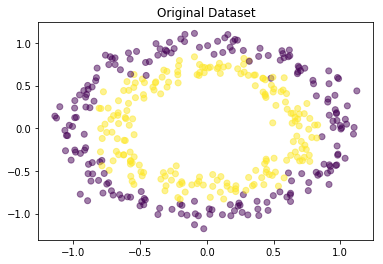

In [33]:
plt.scatter(X[:,0],X[:,1],c=Y,alpha = 0.5)
plt.title('Original Dataset')
plt.show()

In [35]:
x_transformed = np.zeros((X.shape[0],3))

In [38]:
x_transformed[:,:2]=X

In [39]:
print(x_transformed[:5,:])

[[ 0.04412302 -0.68107535  0.        ]
 [-0.90133309  0.39681624  0.        ]
 [ 0.66292743 -0.27791497  0.        ]
 [-0.73945598  0.23649879  0.        ]
 [-0.66747652  0.15178403  0.        ]]


In [40]:
print(X[:5,:])

[[ 0.04412302 -0.68107535]
 [-0.90133309  0.39681624]
 [ 0.66292743 -0.27791497]
 [-0.73945598  0.23649879]
 [-0.66747652  0.15178403]]


In [41]:
transformation = np.zeros(X.shape[0])

In [42]:
for i in range(X.shape[0]):
    transformation[i] = X[i][0]**2 + X[i][1]**2

In [43]:
x_transformed[:,2] = transformation

In [44]:
print(x_transformed[:5,:])

[[ 0.04412302 -0.68107535  0.46581048]
 [-0.90133309  0.39681624  0.96986447]
 [ 0.66292743 -0.27791497  0.51670951]
 [-0.73945598  0.23649879  0.60272682]
 [-0.66747652  0.15178403  0.4685633 ]]


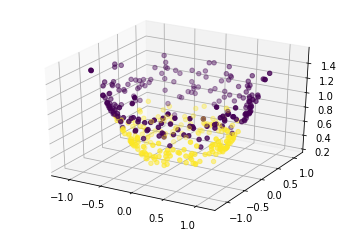

In [46]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_transformed[:,0],x_transformed[:,1],x_transformed[:,2],c = Y)
plt.show()

In [47]:
print(Y[:5])

[1 0 1 1 1]


In [48]:
Y[Y==0] = -1

In [49]:
labels = np.copy(Y)

In [50]:
print(labels[:5])

[ 1 -1  1  1  1]


In [51]:
w = np.zeros((3))
b = 0.0
c = 1.0

In [58]:
def loss(X,labels,w,b,c):
    l = 0
    l += 0.5*(np.dot(w.T,w))
    for i in range(X.shape[0]):
        l += c*(max(0,1-labels[i]*(np.dot(w.T,X[i])+b)))
    return l

In [59]:
def grad_w(X,labels,w,b,c):
    g = np.zeros(w.shape)
    g += w
    for i in range(X.shape[0]):
        if labels[i]*(np.dot(w.T,X[i])+b) >= 1:
            g += np.zeros(w.shape)
        else :
            g -= c*labels[i]*X[i]
    return g
                

In [60]:
def grad_b(X,labels,w,b,c):
    g = 0.0
    for i in range(X.shape[0]):
        if labels[i]*(np.dot(w.T,X[i])+b) >= 1:
            g+=0
        else:
            g -= c*labels[i]
    return g

In [61]:
loss_list = []

In [62]:
def grad_descent(X,labels,w,b,c,learning_rate = 0.001, repeat_times = 500):
    for i in range(repeat_times):
        first = np.zeros(w.shape)
        first = grad_w(X,labels,w,b,c)
        second =  grad_b(X,labels,w,b,c)
        w = w - learning_rate*first
        b = b - learning_rate*second
        l = loss(X,labels,w,b,c)
        loss_list.append(l)
    return w,b

In [63]:
weights,intercept = grad_descent(x_transformed,labels,w,b,c)

In [64]:
print(weights)

[ 0.04541404 -0.05291842 -5.86532413]


In [65]:
print(intercept)

4.350999999999977


In [82]:
x_plot = np.linspace(-1,1,50)
y_plot = np.linspace(-1,1,50)
x_plot,y_plot = np.meshgrid(x_plot,y_plot)

z_plot = np.zeros(x_plot.shape)
z_plot = weights[0]*x_plot + weights[1]*y_plot + intercept
z_plot = z_plot/weights[2]
z_plot = z_plot*-1

z_plot2 = np.zeros(x_plot.shape)
z_plot2 = weights[0]*x_plot + weights[1]*y_plot + intercept + 1
z_plot2 = z_plot2/weights[2]
z_plot2 = z_plot2*-1

z_plot3 = np.zeros(x_plot.shape)
z_plot3 = weights[0]*x_plot + weights[1]*y_plot + intercept -1
z_plot3 = z_plot3/weights[2]
z_plot3 = z_plot3*-1

In [83]:
print(x_plot.shape)
print(y_plot.shape)
print(z_plot.shape)



(50, 50)
(50, 50)
(50, 50)


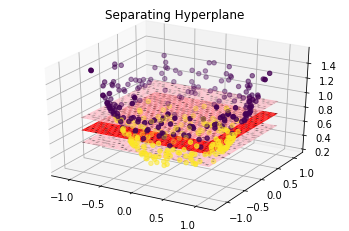

In [84]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_transformed[:,0],x_transformed[:,1],x_transformed[:,2],c = Y)
ax.plot_surface(x_plot,y_plot,z_plot,color='red')
ax.plot_surface(x_plot,y_plot,z_plot2,color='pink')
ax.plot_surface(x_plot,y_plot,z_plot3,color='pink')
ax.set_title('Separating Hyperplane')
plt.show()

In [85]:
## Plotting loss wrt time in our algorithm:

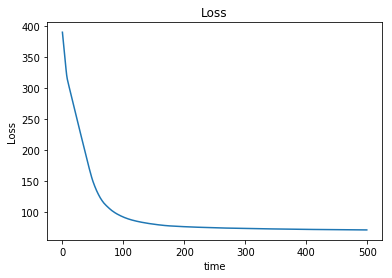

In [86]:
plt.plot(loss_list)
plt.title('Loss')
plt.xlabel('time')
plt.ylabel('Loss')
plt.show()

### Logistic classifier for this data:

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [100]:
lr = LogisticRegression(solver='lbfgs')
Y[Y==-1] = 0

In [101]:
score_for_2d = cross_val_score(lr,X,Y,cv = 10).mean()
print(score_for_2d)

0.40750000000000003


In [102]:
score_for_3d = cross_val_score(lr,x_transformed,labels,cv = 10).mean()
print(score_for_3d)

0.97


In [103]:
lr.fit(x_transformed,labels)
wp = lr.coef_
bp = lr.intercept_
print(wp)
print(bp)

[[-0.02010471 -0.0742558  -8.41765959]]
[6.32000623]


## Note:
Clearly, the accuracy increases significantly when we project the data to a higher dimension.

# PROJECT:

## Image Classification using SVM:

### Multiclass Classification Project:

In [2]:
import numpy as np
import os
from pathlib import Path

In [3]:
p = Path('./images/')

In [4]:
label_dict = {'cat':0,'dog':1,'horse':2,'human':3}
labels = []
image_data = []

In [5]:
from keras.preprocessing import image

Using TensorFlow backend.


In [6]:
for path_dir in p.glob('*'):
    label = str(path_dir).split('\\')[-1][:-1]
    for img_dir in path_dir.glob('*.jpg'):
        img = image.load_img(img_dir,target_size=(100,100))
        img = image.img_to_array(img)
        image_data.append(img)
        labels.append(label_dict[label])

In [7]:
print(len(labels))
print(len(image_data))

808
808


In [8]:
labels = np.asarray(labels)
image_data = np.asarray(image_data,dtype = 'uint32')

#### Randomly shuffling our data:


In [9]:
import random

In [10]:
combined = list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:] = zip(*combined)

In [11]:
print(labels[:5])

[3 3 2 1 1]


In [12]:
print(type(image_data))

<class 'numpy.ndarray'>


In [13]:
import matplotlib.pyplot as plt

3


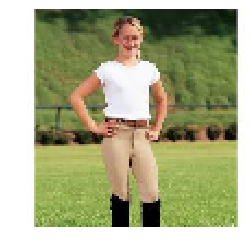

3


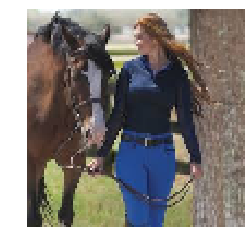

2


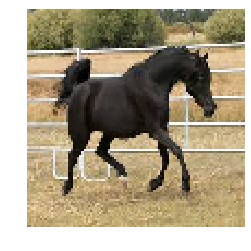

1


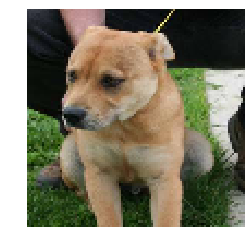

1


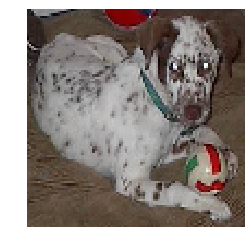

In [14]:
for i in range(0,5):
    print(labels[i])
    plt.imshow(image_data[i])
    plt.axis('off')
    plt.show()

In [15]:
print(image_data[0].shape)

(100, 100, 3)


#### Flattening the image data:

In [17]:
m = image_data.shape[0]
image_data = image_data.reshape(m,30000)

In [18]:
print(image_data.shape)

(808, 30000)


In [21]:
print(type(labels))
print(labels.shape[0])
print(labels)

<class 'numpy.ndarray'>
808
[3 3 2 1 1 1 0 3 0 1 0 0 1 0 2 0 1 0 3 1 0 0 2 2 3 0 3 2 2 2 0 2 1 0 3 1 3
 2 1 0 1 1 3 2 2 0 0 3 1 1 1 2 0 3 0 1 1 0 0 0 2 0 0 1 3 0 0 2 1 2 1 3 2 2
 2 1 2 1 2 2 1 2 3 1 0 0 0 3 3 2 1 2 2 3 3 3 2 2 2 0 0 1 0 3 0 1 0 0 2 3 0
 0 0 0 0 1 1 3 0 3 3 3 0 3 1 0 2 2 2 0 0 3 3 3 2 1 3 0 1 3 3 1 3 2 2 2 3 1
 1 1 3 2 2 1 3 3 1 3 2 1 1 1 0 2 2 0 0 1 3 3 1 2 3 3 3 3 2 2 1 2 2 1 3 3 1
 0 0 3 2 0 3 1 2 3 3 2 0 1 3 0 3 0 2 2 0 1 0 1 3 2 3 1 0 2 0 1 3 3 1 3 0 1
 0 1 0 0 0 1 1 3 2 1 2 3 2 1 2 1 2 0 2 1 1 0 1 2 2 3 0 0 0 2 0 3 3 1 0 0 0
 0 3 2 0 2 1 2 2 0 3 0 3 2 3 2 3 2 1 3 2 2 3 0 3 3 3 3 3 0 2 1 1 2 3 0 0 2
 1 2 2 3 0 3 2 1 1 3 3 3 0 0 0 2 0 2 3 2 0 3 0 3 1 2 3 2 2 2 0 0 1 2 1 0 2
 2 0 3 2 3 0 0 3 2 3 0 0 1 1 0 2 1 3 0 0 3 0 3 1 1 2 2 0 1 3 1 3 0 3 1 1 1
 1 0 3 2 2 3 0 3 0 2 1 1 0 1 0 3 0 2 1 3 3 3 0 0 3 0 1 0 1 0 2 1 0 2 3 3 2
 1 2 1 1 2 2 0 3 0 1 1 3 0 1 0 1 2 0 2 0 1 1 0 3 3 1 2 2 1 2 1 0 1 3 3 3 3
 1 1 0 0 2 0 3 3 3 3 2 1 1 2 2 3 0 1 3 3 1 3 3 2 1 0 0 1 2 2 1 0 2 0 1 0

In [60]:
label_for_svm = []
for i in range(4):
    fake_labels = np.copy(labels)
    fake_labels[fake_labels!=i] = -1
    fake_labels[fake_labels==i] = 1
    label_for_svm.append(fake_labels)
            

In [61]:
print(type(label_for_svm))
print(len(label_for_svm))

<class 'list'>
4


In [63]:
label_for_svm = np.asarray(label_for_svm)
print(label_for_svm.shape)

(4, 808)


#### Using SVM Classifier:

In [65]:
def loss(X,labels,w,b,c):
    l = 0
    l += 0.5*(np.dot(w.T,w))
    for i in range(X.shape[0]):
        l += c*(max(0,1-labels[i]*(np.dot(w.T,X[i])+b)))
    return l


def grad_w(X,labels,w,b,c):
    g = np.zeros(w.shape)
    g += w
    for i in range(X.shape[0]):
        if labels[i]*(np.dot(w.T,X[i])+b) >= 1:
            g += np.zeros(w.shape)
        elif labels[i]*(np.dot(w.T,X[i])+b) < 1:
            g -= c*labels[i]*X[i]
    return g


def grad_b(X,labels,w,b,c):
    g = 0
    for i in range(X.shape[0]):
        if labels[i]*(np.dot(w.T,X[i])+b) >= 1:
            g += 0
        elif labels[i]*(np.dot(w.T,X[i])+b) < 1:
            g -= c*labels[i]
    return g

loss_array = []



def grad_descent(X,labels,w,b,c,learning_rate = 0.001,repeat_times = 500):
    for i in range(repeat_times):
        first = np.zeros(w.shape)
        first = grad_w(X,labels,w,b,c)
        second = grad_b(X,labels,w,b,c)
        w = w - learning_rate*first
        b = b - learning_rate*second
        l = loss(X,labels,w,b,c)
        loss_array.append(l)
    return w,b




In [66]:
w = np.zeros((30000))
print(w.shape)
b = 0.0
c = 100.0 

(30000,)


In [75]:
final_trained = []
for i in range(4):
    w = np.zeros((30000))
    b = 0.0
    c = 100.0 
    w,b = grad_descent(image_data,label_for_svm[i],w,b,c,learning_rate=0.001,repeat_times=500)
    final_trained.append([w,b])

In [77]:
final_trained = np.asarray(final_trained)

In [85]:
print(final_trained[0])
print(final_trained[0][0])
print(final_trained[0][1])

[array([-24253.99163406, -32131.03730698, -25951.50026915, ...,
         2279.47605117,  -6659.25934982,  18550.42470159])
 26.399999999999736]
[-24253.99163406 -32131.03730698 -25951.50026915 ...   2279.47605117
  -6659.25934982  18550.42470159]
26.399999999999736


In [69]:
predictions = []
for img in image_data:
    dist = np.dot(w,img)+b
    if dist>=0:
        predictions.append(1)
    else:
        predictions.append(-1)
predictions = np.asarray(predictions)

In [70]:
print(predictions.shape)

(808,)


In [72]:
correct = np.sum(predictions==label_for_svm[0])
total = 808
accuracy = (correct/total)*100.0
print(accuracy)

76.11386138613861


# DECISION TREES:

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin','Embarked']
data_cleaned = data.drop(columns=columns_to_drop,axis = 1)
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [7]:
data_cleaned = data_cleaned.fillna(data_cleaned['Age'].mean())
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cleaned['Sex'] = le.fit_transform(data_cleaned['Sex'])
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [10]:
### 1 is for male and 0 is for female

In [12]:
Y = data_cleaned[['Survived']]
X = data_cleaned[['Pclass','Sex','Age','SibSp','Parch','Fare']]
print(X.shape)
print(Y.shape)

(891, 6)
(891, 1)


In [194]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols = ['Survived']

In [198]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    ent = 0.0
    for idx in counts[1]:
        p = idx/N
        ent += (-1*p*np.log2(p))
    
    return ent

In [199]:
def divide_data(x_data,fkey,fval):
    left_data = pd.DataFrame([],columns=data_cleaned.columns)
    right_data = pd.DataFrame([],columns=data_cleaned.columns)
    for idx in range(x_data.shape[0]):
        val = x_data[fkey].loc[idx]
        if val>fval:
            right_data = right_data.append(x_data.loc[idx])
        else:
            left_data = left_data.append(x_data.loc[idx])
    return left_data,right_data

In [200]:
def information_gain(x_data,fkey,fval):
    left_data,right_data = divide_data(x_data,fkey,fval)
    l = float(left_data.shape[0])/x_data.shape[0]
    r = float(right_data.shape[0])/x_data.shape[0]
    if left_data.shape[0] == 0 or right_data.shape[0]==0:
        return -100000
    ig = entropy(x_data.Survived)-(l*entropy(left_data.Survived)+r*entropy(right_data.Survived))
    return ig

In [201]:
# Testing our functions:

In [202]:
for cols in X.columns:
    print(cols)
    print(information_gain(data_cleaned,cols,data_cleaned[cols].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [203]:
### Using OOP for making Decision Tree:

In [204]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.target = None
        self.fkey = None
        self.fval = None
        self.depth = depth
        self.max_depth = max_depth
    def train(self,X_train):
        features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains = []
        for ix in features:
            info_gains.append(information_gain(X_train,ix,X_train[ix].mean()))
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        
        print('Making Tree Feature is ',self.fkey)
        
        left_data,right_data = divide_data(X_train,self.fkey,self.fval)
        left_data = left_data.reset_index(drop=True)
        right_data = right_data.reset_index(drop=True)
        if left_data.shape[0]==0 or right_data.shape[0]==0:
            if X_train.Survived.mean()>=0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        if (self.depth>=self.max_depth):
            if X_train.Survived.mean()>=0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        # Recursion.............................................
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(left_data)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(right_data)
        if X_train.Survived.mean()>0.5:
                self.target = 'Survived'
        else:
                self.target = 'Dead'
        return
    def predict(self,test):
        if test[self.fkey]>self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

### Train-Validation-Test Set Split

In [205]:
split = int(0.7*data_cleaned.shape[0])
train_data = data_cleaned[:split]
test_data = data_cleaned[split:]
test_data = test_data.reset_index(drop=True)

In [206]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [207]:
dt = DecisionTree()

In [208]:
dt.train(train_data)

Making Tree Feature is  Sex
Making Tree Feature is  Pclass
Making Tree Feature is  Age
Making Tree Feature is  SibSp
Making Tree Feature is  Pclass
Making Tree Feature is  Age
Making Tree Feature is  Age
Making Tree Feature is  SibSp
Making Tree Feature is  Parch
Making Tree Feature is  Pclass
Making Tree Feature is  SibSp
Making Tree Feature is  Fare
Making Tree Feature is  Parch
Making Tree Feature is  Age
Making Tree Feature is  Pclass
Making Tree Feature is  Age
Making Tree Feature is  Age
Making Tree Feature is  Parch
Making Tree Feature is  SibSp
Making Tree Feature is  Fare
Making Tree Feature is  Age
Making Tree Feature is  Age
Making Tree Feature is  Fare
Making Tree Feature is  Age
Making Tree Feature is  Age
Making Tree Feature is  Fare
Making Tree Feature is  Age
Making Tree Feature is  Parch
Making Tree Feature is  Fare
Making Tree Feature is  Fare
Making Tree Feature is  Fare
Making Tree Feature is  Age
Making Tree Feature is  Fare
Making Tree Feature is  Parch
Making Tre

In [209]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [210]:
y_pred = []
for idx in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[idx]))

In [211]:
print(len(y_pred))
print(y_pred[:10])

268
['Dead', 'Dead', 'Dead', 'Dead', 'Survived', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead']


In [212]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [213]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [214]:
### Survived = 1           Dead = 0

In [215]:
y_pred = np.asarray(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [216]:
y_actual = test_data['Survived']
y_actual = np.array(y_actual).reshape((-1,1))

In [217]:
accuracy = np.sum(y_pred==y_actual)/y_actual.shape[0]

In [218]:
print(accuracy)

0.8171641791044776


## Decision Tree using Sklearn

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [220]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [221]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [222]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

## Visulaizing a Decision Tree:

In [256]:
import pydotplus

In [257]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [258]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

In [259]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Neural Networks:

## Implementing Artificial Neural Network:

In [1]:
import numpy as np

In [42]:
def softmax(z):
    dr = np.exp(z)
    ans = dr/np.sum(dr,axis = 1,keepdims=True)
    return ans

def convert_to_oht(y,depth = 2):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    for i in range(m):
        if y[i]==1:
            y_oht[i,1]=1
        else:
            y_oht[i,0]=1
    return y_oht

In [10]:
## Testing softmax and convert_to_oht function:

z = np.array([[1],[0],[1],[0]])
print(convert_to_oht(z))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


### Generating a dataset with 2 features and 2 classes for classification using NNs:

In [148]:
import matplotlib.pyplot as plt

In [149]:
from sklearn.datasets import make_circles

In [150]:
X,y = make_circles(n_samples=500,noise=0.02)

In [151]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


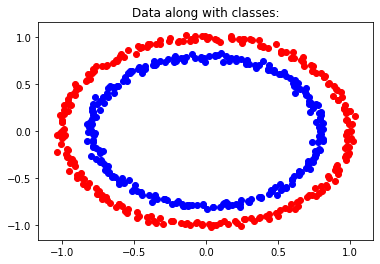

In [152]:
colors = {0:'red',1:'blue'}
for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1],color = colors[y[i]])
plt.title('Data along with classes:')
plt.show()

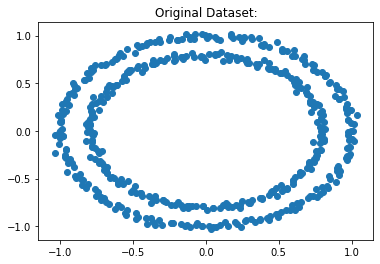

In [153]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset:')
plt.show()

### Now we will use NNs for classification:

In [154]:
import numpy as np

In [155]:
def softmax(z):
    dr = np.exp(z)
    ans = dr/np.sum(dr,axis = 1,keepdims=True)
    return ans

def convert_to_oht(y,depth = 2):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    for i in range(m):
        if y[i]==1:
            y_oht[i,1]=1
        else:
            y_oht[i,0]=1
    return y_oht

In [311]:
# Input parameters:
input_size = 2
layers = [4,3]
output_size = 2

#Neural Network class:
class Neural_Network:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['w1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        model['w2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        model['w3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model
        
    def predict(self,x):
        y_out = self.forward_propagation(x)
        return np.argmax(y_out,axis = 1)
    
    def forward_propagation(self,x):
        model = self.model
        z1 = np.dot(x,model['w1'])+model['b1']
        a1 = np.tanh(z1)
        z2 = np.dot(a1,model['w2'])+model['b2']
        a2 = np.tanh(z2)
        z3 = np.dot(a2,model['w3'])+model['b3']
        y_ = softmax(z3)
        self.activation_values = (a1,a2,y_)
        return y_
    
    def backward_propagation(self,x,y_oht,learning_rate):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        a1,a2,y_ = self.activation_values
        delta3 = y_ - y_oht
        grad_w3 = np.dot(a2.T,delta3)
        grad_b3 = np.sum(delta3,axis = 0)
        
        delta2 = (np.dot(delta3,w3.T))*(1-np.square(a2))
        grad_w2 = np.dot(a1.T,delta2)
        grad_b2 = np.sum(delta2,axis = 0)
        
        
        delta1 = (np.dot(delta2,w2.T))*(1-np.square(a1))
        grad_w1 = np.dot(np.tanh(x).T,delta1)
        grad_b1 = np.sum(delta1,axis = 0)
        
        self.model['w1'] -= learning_rate*grad_w1
        self.model['w2'] -= learning_rate*grad_w2
        self.model['w3'] -= learning_rate*grad_w3
        
        self.model['b1'] -= learning_rate*grad_b1
        self.model['b2'] -= learning_rate*grad_b2
        self.model['b3'] -= learning_rate*grad_b3


In [312]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l 

In [331]:
def training_nn(X,y,model,epoch = 1000, learning_rate=0.01):
        loss_list = []
        y_oht = convert_to_oht(y)
        for idx in range(epoch):
            y_ = model.forward_propagation(X)
            l = loss(y_oht,y_)
            loss_list.append(l)
            model.backward_propagation(X,y_oht,learning_rate=learning_rate)
        return loss_list

In [314]:
my_nn = Neural_Network(input_size,layers,output_size)

In [315]:
loss_list = training_nn(X,y,my_nn)

In [316]:
print(len(loss_list))

1000


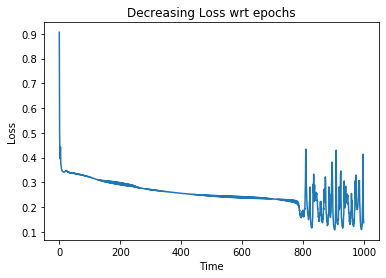

In [317]:
plt.plot(loss_list)
plt.xlabel("Time")
plt.ylabel("Loss")
plt.title("Decreasing Loss wrt epochs")
plt.show()

In [301]:
## Making Predictions using our Trained Neural Network:

In [319]:
predictions = my_nn.predict(X)

In [320]:
print(predictions.shape)

(500,)


In [323]:
accuracy = (np.sum(predictions==y)/y.shape[0])*100

print("Accuracy of this neural network is %.2f percent."%accuracy)

Accuracy of this neural network is 92.00 percent.


# Visualization:

In [309]:
from visualize import plot_decision_boundary

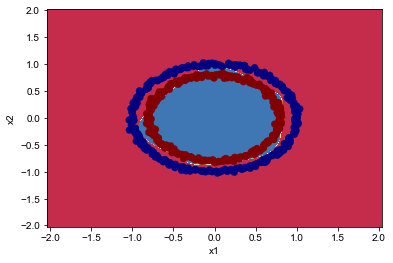

In [318]:
plot_decision_boundary(lambda x:my_nn.predict(x),X,y)

# Using NNs on different datasets:

#### 1) XOR Dataset:

In [332]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

In [333]:
model = Neural_Network(input_size=2,layers=[10,5],output_size=2)

In [334]:
loss_list = training_nn(X,y,model)

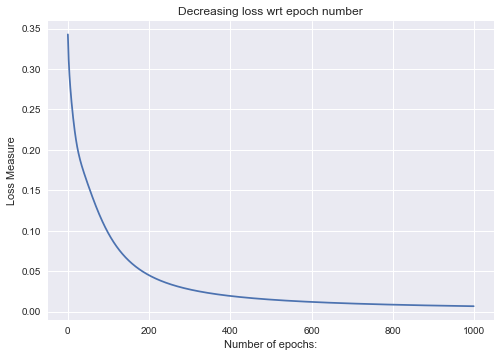

In [336]:
plt.plot(loss_list)
plt.xlabel("Number of epochs:")
plt.ylabel("Loss Measure")
plt.title("Decreasing loss wrt epoch number")
plt.show()

In [337]:
predictions = model.predict(X)
accuracy = (np.sum(predictions==y)/X.shape[0])*100
print("The accuracy of the NN on this dataset is %.2f percent."%accuracy)

The accuracy of the NN on this dataset is 100.00 percent.


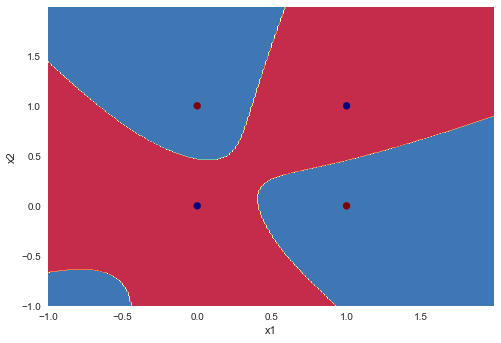

In [338]:
## Visualizing decision surfaces:
plot_decision_boundary(lambda x:model.predict(x),X,y)

# Other datasets:

In [339]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [366]:

def load_dataset(d):
    if d == "moons":
        X,y = make_moons(n_samples=500,noise = 0.2,random_state=1)
    elif d == "circles":
        X,y = make_circles(n_samples=500,noise = 0.2,random_state=1,factor = 0.2)
    elif d == "classification":
        X,y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        y = np.array([0,1,1,0])
    return X,y

Training Accuracy 97.2000
Training Accuracy 97.8000
Training Accuracy 96.8000
Training Accuracy 100.0000


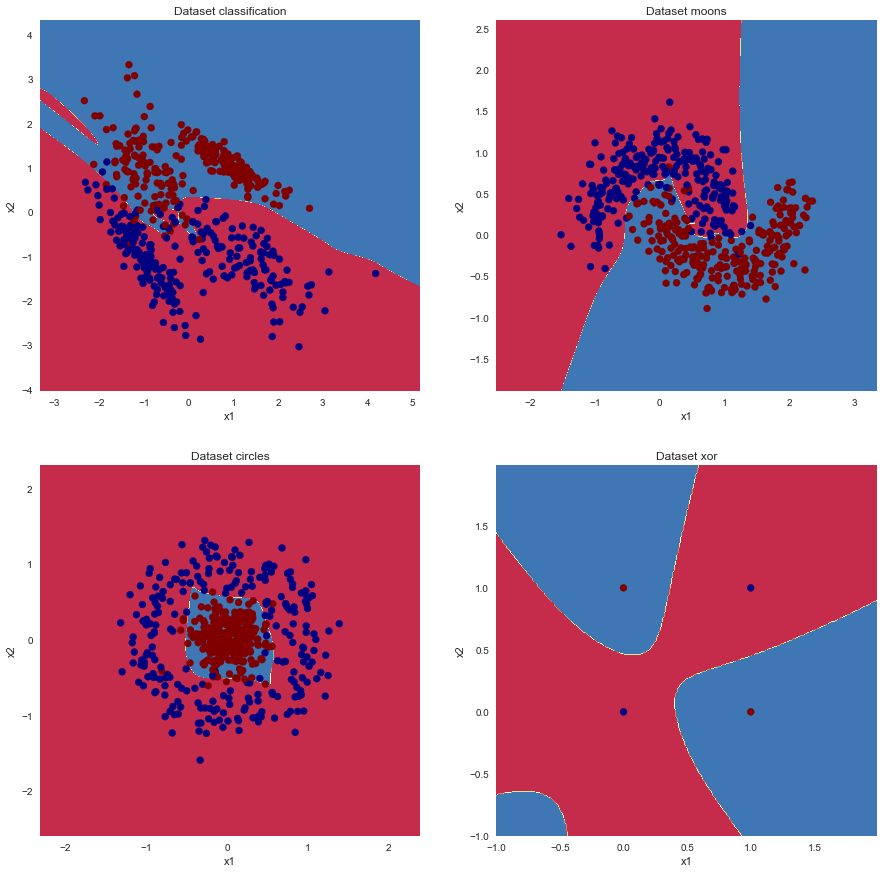

In [368]:
datasets = ["classification","moons","circles","xor"]
id = 1
plt.figure(figsize=(15,15))
for d in datasets:
    model = Neural_Network(input_size=2,layers=[10,5],output_size=2)
    X,y = load_dataset(d)
    training_nn(X,y,model,epoch=1000)
    
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==y)/y.shape[0]
    print("Training Accuracy %.4f"%(training_accuracy*100))
    
    no = 220+id
    
    plt.subplot(no)
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,y)
    id +=1

plt.show()

## Note:
#### We can adjust various hyper-parameters such as number of hidden layers, number of neuron in each hidden layer, number of epochs, learning rate,etc.

# Image classification using Neural Network:

### Working on Pokemon Dataset

In [1]:
import os

In [2]:
from pathlib import Path

In [4]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [72]:
path = Path("./Pokemon_mini/")
wds = path.glob("*")

image_data = []
labels = []

label_dict = {"Bulbasaur":0,"Meowth":1,"Pikachu":2}
label_to_name = {0:"Bulbasaur",1:"Meowth",2:"Pikachu"}

for wd in wds:
    label = str(wd).split("\\")[-1]
    print(label)
    img_count = 0
    for pic in wd.glob("*.jpg"):
        img = image.load_img(pic,target_size=(40,40))
        img = image.img_to_array(img)
        image_data.append(img)
        labels.append(label_dict[label])
        img_count+=1
    print(img_count)

Bulbasaur
176
Meowth
70
Pikachu
199


In [73]:
import numpy as np

In [74]:
image_data = np.asarray(image_data)
labels = np.asarray(labels)

print(image_data.shape)
print(labels.shape)

(445, 40, 40, 3)
(445,)


In [79]:
## Flattening the image in order to extract features:

flattened_img_data = []
for idx in range(image_data.shape[0]):
    arr = image_data[idx,:,:,:].flatten()
    flattened_img_data.append(arr)
flattened_img_data = np.asarray(flattened_img_data)
print(flattened_img_data.shape)

(445, 4800)


### Visualization:

In [59]:
image_data = image_data.astype(int)
labels = labels.astype(int)

In [60]:
## Function to draw images:
def draw_image(img,label):
    plt.imshow(img)
    plt.title(label_to_name[label])
    plt.axis('off')
    plt.show()

In [61]:
import random

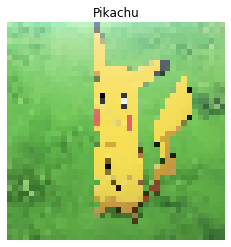

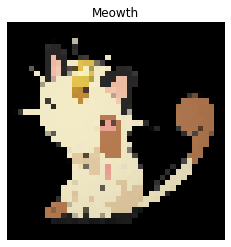

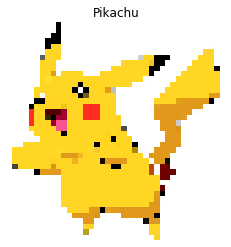

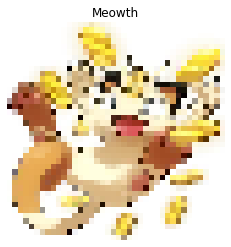

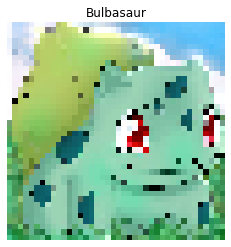

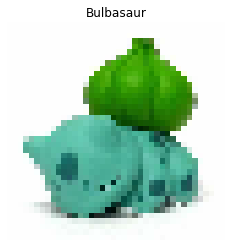

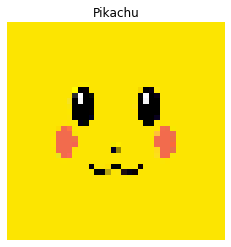

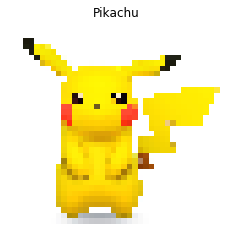

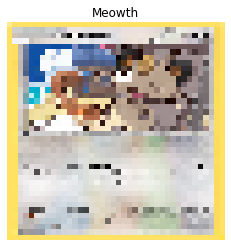

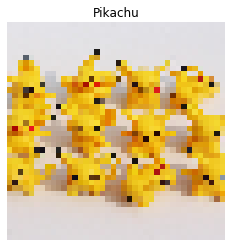

In [62]:
## Drawing ten random images:
random.seed(0)
for idx in range(10):
    index = random.randint(0,444)
    draw_image(image_data[index],labels[index])

In [64]:
# We will have 4800 neurons in the input layer, ie, there are 4800 features for our model.

In [100]:
split = int(labels.shape[0]*0.8)
img_train = flattened_img_data[:split,:]
labels_train = labels[:split]
img_test = flattened_img_data[split:,:]
labels_test = labels[split:]

print(img_train.shape)
print(img_test.shape)

(356, 4800)
(89, 4800)


### Using NNs for classification:

In [88]:
# Input parameters:
input_size = 4800
layers = [100,50]
output_size = 3

#Neural Network class:
class Neural_Network:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['w1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        model['w2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        model['w3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model      
   
    def predict(self,x):
        y_out = self.forward_propagation(x)
        return np.argmax(y_out,axis = 1)
    
    def forward_propagation(self,x):
        model = self.model
        z1 = np.dot(x,model['w1'])+model['b1']
        a1 = np.tanh(z1)
        z2 = np.dot(a1,model['w2'])+model['b2']
        a2 = np.tanh(z2)
        z3 = np.dot(a2,model['w3'])+model['b3']
        y_ = softmax(z3)
        self.activation_values = (a1,a2,y_)
        return y_
    
    def backward_propagation(self,x,y_oht,learning_rate):

        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        a1,a2,y_ = self.activation_values
        delta3 = y_ - y_oht
        grad_w3 = np.dot(a2.T,delta3)
        grad_b3 = np.sum(delta3,axis = 0)

        delta2 = (np.dot(delta3,w3.T))*(1-np.square(a2))
        grad_w2 = np.dot(a1.T,delta2)
        grad_b2 = np.sum(delta2,axis = 0)


        delta1 = (np.dot(delta2,w2.T))*(1-np.square(a1))
        grad_w1 = np.dot(np.tanh(x).T,delta1)
        grad_b1 = np.sum(delta1,axis = 0)

        self.model['w1'] -= learning_rate*grad_w1
        self.model['w2'] -= learning_rate*grad_w2
        self.model['w3'] -= learning_rate*grad_w3

        self.model['b1'] -= learning_rate*grad_b1
        self.model['b2'] -= learning_rate*grad_b2
        self.model['b3'] -= learning_rate*grad_b3


def softmax(z):
    dr = np.exp(z)
    ans = dr/np.sum(dr,axis = 1,keepdims=True)
    return ans

def convert_to_oht(y,depth = 3):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    for i in range(m):
        if y[i]==1:
            y_oht[i,1]=1
        elif y[i]==2:
            y_oht[i,2] = 1
        else:
            y_oht[i,0]=1
    return y_oht 

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l 

def training_nn(X,y,model,epoch = 1000, learning_rate=0.01):
    loss_list = []
    y_oht = convert_to_oht(y)
    for idx in range(epoch):
        y_ = model.forward_propagation(X)
        l = loss(y_oht,y_)
        loss_list.append(l)
        model.backward_propagation(X,y_oht,learning_rate=learning_rate)
    return loss_list

In [101]:
pika = Neural_Network(input_size=input_size,layers = layers,output_size=output_size)

In [102]:
loss_list = training_nn(img_train,labels_train,pika,epoch = 1000,learning_rate=0.0002)

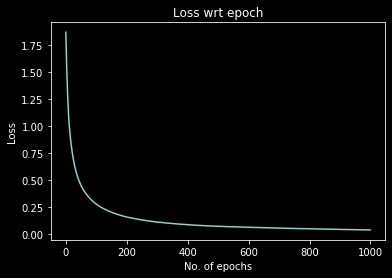

In [110]:
plt.style.use("dark_background")
plt.plot(loss_list)
plt.title('Loss wrt epoch')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()

In [104]:
predictions = pika.predict(img_train)

In [106]:
accuracy = (np.sum(predictions==labels_train)/labels_train.shape[0])*100
print("The accuracy obtained on the training set is %.4f."%accuracy)

The accuracy obtained on the training set is 97.4719.


In [107]:
predictions = pika.predict(img_test)
accuracy = (np.sum(predictions==labels_test)/labels_test.shape[0])*100
print("The accuracy obtained on the test set is %.4f."%accuracy)

The accuracy obtained on the test set is 62.9213.


## Note:
Clearly, there is the case of overfitting in our model, because of the difference between training and test set accuracy.

## Note:
f1 score is the harmonic mean of precision and recall in the classification problems.

## Confusion Matrix:

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [112]:
from visualize import plot_confusion_matrix

In [113]:
predictions = pika.predict(img_train)

In [114]:
cnf_matrix = confusion_matrix?

In [115]:
cnf_matrix = confusion_matrix(labels_train,predictions)

In [116]:
plot_confusion_matrix?

Confusion matrix, without normalization
[[173   3   0]
 [  0  66   4]
 [  2   0 108]]


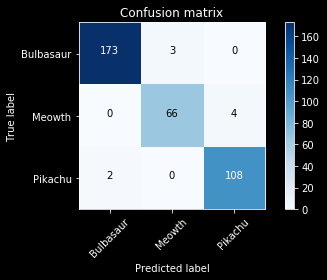

In [117]:
plot_confusion_matrix(cnf_matrix,classes=[label_to_name[0],label_to_name[1],label_to_name[2]])

In [119]:
classification_report?

In [124]:
# We only used training data to make confusion matrix
print(classification_report(labels_train,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       176
           1       0.96      0.94      0.95        70
           2       0.96      0.98      0.97       110

    accuracy                           0.97       356
   macro avg       0.97      0.97      0.97       356
weighted avg       0.97      0.97      0.97       356



In [125]:
## f1-score is the Harmonic Mean of precision and recall.
## support is the number of entries per label.
## Precision = diagonal_entry/col_sum
## Recall = diagonal_entry/row_sum

#### This concludes the project on image classification of pokemons using Neural Networks.

# PROJECT

### Sentiment Analysis using Neural Networks:

### Classifying movie reviews:

In [126]:
## Input: 50,000 reviews
## Output: Positive and Negative reviews

In [127]:
from keras.datasets import imdb

In [128]:
((x_train,y_train),(x_test,y_test)) = imdb.load_data?

In [129]:
((x_train,y_train),(x_test,y_test)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 36s 2us/step


In [130]:
print(type(x_train))

<class 'numpy.ndarray'>


In [131]:
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [136]:
print(len(x_train[0]))

218
